# DS 7331 Data Mining: Lab 1 iPython Notebook

### Created On: January 19, 2019
### Authors:  
####                 Arora, Tanvi                
####                 Chandna, Rajat
####                 Henderson Kuns, Nicol
####                 Kumar, Ramasundaram
####                 Vasquez, James


# Business Understanding 

The data set selected is 'Bank Marketing', provided from the UCI Machine Learning Repository site.  The data contains, 45,211 rows and 17 attributes.  This data set follows a Portuguese telemarketing campaign to secure term deposits. The data set is unbalance as the response variable is 11% of the total data set.  The data was collected from May of 2008 to November 2010.  As part of the UCI data set a testing data set has been segregated for prediction which is 10% of the data set with 17 inputs, randomly selected from three older versions of this input. 

The Portuguese market dramatically took a steep decline in 2008 and started an upward movement in 2013 but not nearly to what the market was prior to 2008.  This deep drop is consistent with the global recession at the time (figure 1). Understanding the demographic of clients who subscribed at the time, the banks can concentrate their efforts towards the clients who would likey subscribed to term deposits during this recession.  With industries under greater pressure to obtain additional cash flow, knowing the successful demographics of your client base the industry can efficiently direct resources to this sub group of cliental.  It becomes a way to successfully target your base cliental. 

_Figure 1:_
![alt text](https://github.com/nhendersonkuns/awesomedataminers/raw/master/ReferenceMaterial/StockMarketCompare.PNG "US vs Portugal Stock")

The goal of this data set and followed analyses is to predict whether a client would subscribe to a term deposit. This is measured by the attribute 'Subscribed' as a binary response of yes/no.

The team will pursue several methodologies in creating an accurate predictive model for analysis with models built using logistic regression, support vector machines (SVM) and decision trees methods which will be built in Python. Model type will be validated by use of segregated testing data set provided by UCI.  Exploration into K-Fold validation will be explored, however it is the team’s initial thought since the data set is so unbalanced that their could be a bias in the response of ‘no’ for the data set.

To measure the effectiveness/success of these models the team will explore techniques such as Percent Correct Classification (PCC) and Confusion Matrix's which will summarizes different kinds of errors (Type I and Type II errors). These methods will allow the team to understand the accuracy and precision of the models being built.

# Data Meaning Type

The data captured by the marketing campaign is as follows:

- **Age** – Age is a numeric variable that ranges from ages 18-95 years.  
- **Job** – Job type is a categorical variable that entered the client into types of occupations.  The choices were: admin., unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician and services.  
- **Marital** – Marital status is a categorical variable that describes if the client is married, divorced or single.  For widowed clients, the bank has selected the divorced selection.
- **Education** – Education represents the client’s highest level of education.  The categorical variable has the following selections:  unknown, primary, secondary or tertiary.  Primary level is equivalent to the US elementary and middle school grades.  Secondary is similar to the US high school, but is split between more professional teachings versus vocations.  Tertiary level represents all level of higher education from special licenses, bachelors to post doctorate school (https://www.scholaro.com/pro/Countries/Portugal/Education-System).
- **Default** – Default represents if the client has defaulted in their credit history as a binary variable denoted with yes for default or no for no default.
- **Balance** – Balance is a numeric variable 
- **Housing** – Housing is a binary variable which represents if the client has a home loan or not.  The selections are yes or no.
- **Loan** – Loan is similar to the housing variable except it represents if the client has a personal loan.
- **Contact** – Contact is a categorical variable describing the method of telecommunication between the bank and the client.  The selections are:  unknown, telephone or cellular.
- **Day** – Day is a numeric variable that represents the day of the month of the last contact.
- **Month** – Month is represented as a categorical variable where each month is denoted by the first three letters.  Every month of the year is represented.  The month corresponds to the last contact made with the client.
- **Duration** – Duration is the amount of time (a numeric variable) in seconds that the last contact with the client lasted.  This attribute is not the total time the clients were interviewed.   1% of the instances lasted 10 seconds or less.  Is there a reason why something like this is a cause of concern?  Since they tell us there are multiple calls, perhaps it doesn’t matter.  
- **Campaign** – Campaign is a numeric variable which represents the number of times the bank has contacted, using any method of communication, the client during this particular marketing campaign.
- **pDays** – pDays is a numeric variable which denotes the number of days that has passed between a previous marketing campaign and the current marketing campaign.  The ranges are from -1 identifying these are new clients to the marketing campaign up to over 2 years ago.
- **Previous** – Previous is a numeric variable that identifies the number of times a client has been involved with a marketing campaign with this bank prior to the current campaign.  The ranges for this are 0 which would represent this is the first marketing campaign the client is involved with to 275. (all the data points are from 0-58 with 275 appearing to be an outlier?? Haven’t checked anything else here, just a notation at this point)
- **pOutcome** – pOutcome represents the outcome of a previous marketing campaign.  The categorical variable is identified by:  unknown, other, failure or success.  Each client that has not participated in a previous marketing campaign has been marked as unknown for pOutcome.
- **Y** – Y signifies yes if the customer accepted a term deposit during the current marketing campaign.  The binary variable is defined as yes or no.  In the remaining portions of the report, this variable is denoted as subscribed with the results remaining as yes or no. 


# Data Quality

In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



In [3]:
# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [4]:
bankPromo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Data Types for columns are matching as specified in data description. Columns containing numeric data are represented as of type "int64" ( values in those columns is integer and not float) and columns containing categorical variables are represented as of type "object".

dtypes: int64(7), object(10)

Also, number of entries in all columns is same, signalling that either data contains no missing values or missing values have been already replaced with some specific values(eg -1,999 or mean/median of the series etc). Next we would try to uncover details on these missing values.

In [5]:
bankPromo_df.isnull().any()

age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
Subscribed    False
dtype: bool

In [6]:
# To find duplicated rows in data Frame
bankPromo_df.duplicated().any()

False

In [7]:
bankPromo_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass

print(numericalVars)
print(categoricalVars)


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']


In [9]:
for categoricalCol in categoricalVars:
    print("\n The Unique values(Levels) for \033[1m %s \033[0m variable are: \n" %categoricalCol.upper())
    print(pd.Series(bankPromo_df[categoricalCol].unique()))



 The Unique values(Levels) for  JOB  variable are: 

0        management
1        technician
2      entrepreneur
3       blue-collar
4           unknown
5           retired
6            admin.
7          services
8     self-employed
9        unemployed
10        housemaid
11          student
dtype: object

 The Unique values(Levels) for  MARITAL  variable are: 

0     married
1      single
2    divorced
dtype: object

 The Unique values(Levels) for  EDUCATION  variable are: 

0     tertiary
1    secondary
2      unknown
3      primary
dtype: object

 The Unique values(Levels) for  DEFAULT  variable are: 

0     no
1    yes
dtype: object

 The Unique values(Levels) for  HOUSING  variable are: 

0    yes
1     no
dtype: object

 The Unique values(Levels) for  LOAN  variable are: 

0     no
1    yes
dtype: object

 The Unique values(Levels) for  CONTACT  variable are: 

0      unknown
1     cellular
2    telephone
dtype: object

 The Unique values(Levels) for  MONTH  variable are: 

0   

Looks like for categorical variables, the missing values in columns is replaced with string "unknown" as seen from several columns above. Next look at percentage(%) of observations that are considered as unknown in these categorical variables columns.

In [10]:
sumMissingValsinCategoricalCols = dict()
for categoricalCol in categoricalVars:
    sumMissingValsinCategoricalCols[categoricalCol] = (sum(bankPromo_df[categoricalCol] == "unknown") / \
                                                       bankPromo_df[categoricalCol].count()) * 100

pd.Series(sumMissingValsinCategoricalCols)


job            0.637013
marital        0.000000
education      4.107407
default        0.000000
housing        0.000000
loan           0.000000
contact       28.798301
month          0.000000
poutcome      81.747805
Subscribed     0.000000
dtype: float64

Despite pOutcome having a large percentage considered unknown, all but 5 entries were expected to have this result.  For clients that have not participated in a prior marketing campaign, the result for pOutcome is listed as unknown.  We could replace this variable with something like not applicable if so desired.  So the number of prior marketing campaign participants that have an pOutcome of unknown is 0.0088%.  28.8% of contact is considered as unknown, but all contact was made voice to voice and no clients were contacted via email or some other written form.  
For these reasons, we are treating unknown in each of these variables as their own catgeory - we are not removing or imputing these values.  We have no business knowledge that would make us consider these as invalid or provide us with the sampling populations to disburse those into statistically approriate categories.

In [11]:
# Creating a copy of original dataset and coverting Subscribed column from Yes, No to 0,1
# TO be later used in Visualizations
visDf = bankPromo_df.copy()
visDf['Subscribed_int'] = visDf['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
visDf['Subscribed_int'] = visDf['Subscribed_int'].astype(np.int)

# Simple Statistics

In [12]:
# For Numerical Variables 
bankPromo_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


There may be a few data points to investigate as potential outliers based on the distance away from the mean, standard deviation or the third quartile.  
1. Balance - the max balance is far over the third quartile
2. Duration - the max listed as 4918 is over 19 times greater than the mean duration
3. Campaign - with the average number of campaign involvements being approximately 2.5, a client having 63 campaign involvements could be an error.
4. Pdays - the max value of 871 days may or may not be an issue.  With a large portion of the data considered as having -1 days to indicate no prior marketing campaign, that could have skewed the mean lower than without those values.  We will take a look at the makeup of the data in a future section.
5. Previous - with a mean of 0.58 and a standard deviation of only 2.3, a max value of 275 could indicate this as an outlier. 
No other outliers are noted at this time during the analysis.

In [13]:
# Binning variable "balance" into different buckets for analysis
balanceBins =[-5000,0,1000,5000,10000,15000,150000]
balanceGroups = pd.cut(bankPromo_df['balance'], balanceBins).value_counts()
percentGroup = balanceGroups/(bankPromo_df['balance'].count())*100
print(percentGroup)


(0, 1000]          51.536131
(1000, 5000]       26.068877
(-5000, 0]         16.097852
(5000, 10000]       4.459092
(10000, 15000]      1.057265
(15000, 150000]     0.776360
Name: balance, dtype: float64


16% of the people contacted had either 0 or negative balance. Nearly 52% had a balance between 0 and 1000. Approximately 26% had a balance between 1000 and 5000. 94% of the people contacted had a balance of less than 5000.

In [14]:
# Binning variable "duration" into different buckets for analysis
durationBins =[0,10,120,600,1200,5000]
durationGroups = pd.cut(bankPromo_df['duration'], durationBins).value_counts()
percentGroup = durationGroups/(bankPromo_df['duration'].count())*100
print(percentGroup)

(120, 600]      60.553848
(10, 120]       30.138683
(600, 1200]      7.144279
(1200, 5000]     1.238637
(0, 10]          0.917918
Name: duration, dtype: float64


31% of the calls lasted less than 2 minutes. Two minutes or less may not be sufficient for a promotion call. 61% of the calls lasted between 2 to 5 minutes. The remaining 8% lasted for longer than five minutes.

In [15]:
# For Categorical Variables
for categoricalCol in categoricalVars:
    tmpDf1 = pd.DataFrame()
    tmpDf2 = pd.DataFrame()
    tmpDf1 = pd.crosstab(index = bankPromo_df[categoricalCol], columns = "Count", colnames = " ")
    tmpDf1["Proportion(in % of Total)"] = (tmpDf1["Count"] / tmpDf1["Count"].sum()) * 100
    tmpDf1 = tmpDf1.round(2)
    tmpDf1.index.name = tmpDf1.index.name.upper()
    tmpDf2 = pd.DataFrame(index = ["TOTAL"], data = [[tmpDf1["Count"].sum(), \
                                                      tmpDf1["Proportion(in % of Total)"].sum()]], \
                          columns=["Count", "Proportion(in % of Total)"])
    tmpDf1 = tmpDf1.append(tmpDf2)
    print("\n Counts and Frequency Table for \033[1m %s \033[0m variable is as: \n" %categoricalCol.upper())
    print(tmpDf1)
    print("\n")


 Counts and Frequency Table for  JOB  variable is as: 

               Count  Proportion(in % of Total)
admin.          5171                      11.44
blue-collar     9732                      21.53
entrepreneur    1487                       3.29
housemaid       1240                       2.74
management      9458                      20.92
retired         2264                       5.01
self-employed   1579                       3.49
services        4154                       9.19
student          938                       2.07
technician      7597                      16.80
unemployed      1303                       2.88
unknown          288                       0.64
TOTAL          45211                     100.00



 Counts and Frequency Table for  MARITAL  variable is as: 

          Count  Proportion(in % of Total)
divorced   5207                      11.52
married   27214                      60.19
single    12790                      28.29
TOTAL     45211                     

There are a number of imbalances in some of the categorical variables.
1. Deafult - 98% of the campaign population does not have a default listed on their credit report.
2. Loan - 83% does not have a home loan.  
3. Contact - 28% is listed as unknown.  As mentioned previously, we will be considering these their own category going forth.
4. Poutcome - over 80% of the campaign population has not been previoulsy contacted for a marketing campaign.
5. Subscribed - Just over 10% subscribed to the term deposit as compared to the 88% that did not.
No research was found on any of these variables to compare them to the overall Portuguese population or prior marketing campaigns and their results.
All other variables did not indicated a significant imbalance and thus not specificially noted in this section.

# Visualize Attributes

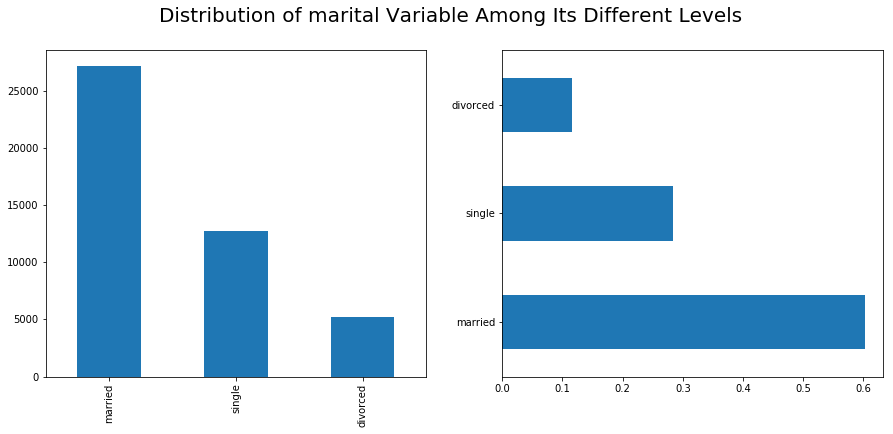

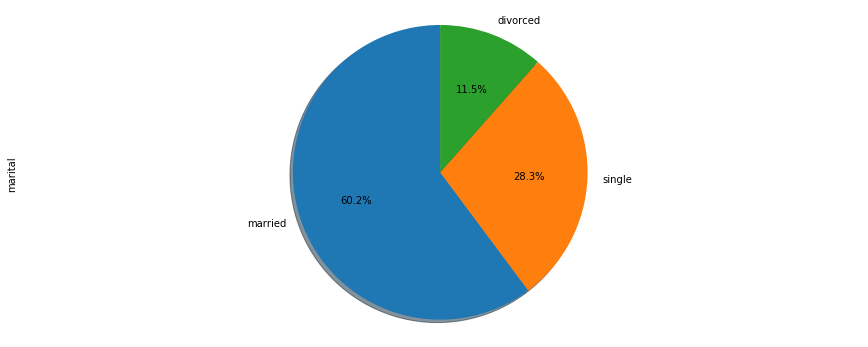

In [16]:
catVar = 'marital'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

The marital status of the clients show the number of married clients is more than double that of single clients.  The divorced clients, which represents divorced and widowed clients, is approximately five times less than those of the married clients.
Marital status is analyzed to help assess risk.  Clients in the divorced category may have alimony to pay, for instance.

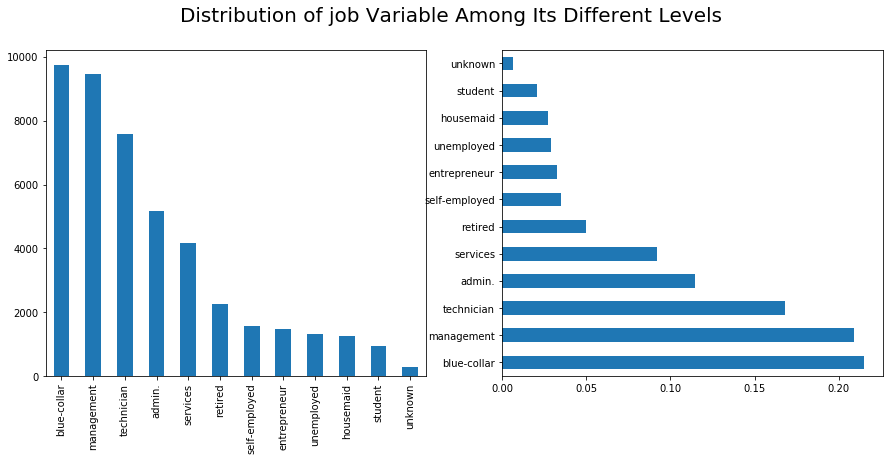

In [17]:
catVar = 'job'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
#fig, axes12 = plt.subplots(1,1,figsize=(15,6))
#bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
#axes12.axis('equal')
#plt.tight_layout()
plt.show()


Blue-collar, management and technician jobs make over 50% of the campaign population.  This variable helps to indicate salary amount or predictable salary of a potential client.   The unemployment rate captured in the campaign is much lower than than the average Portugal unemployment rate during the time period of 2008-2010 ranged from 7-10% (https://tradingeconomics.com/portugal/unemployment-rate).

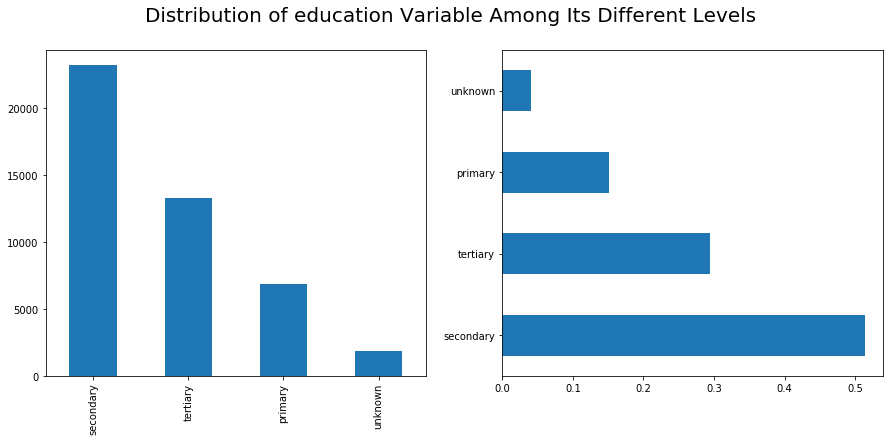

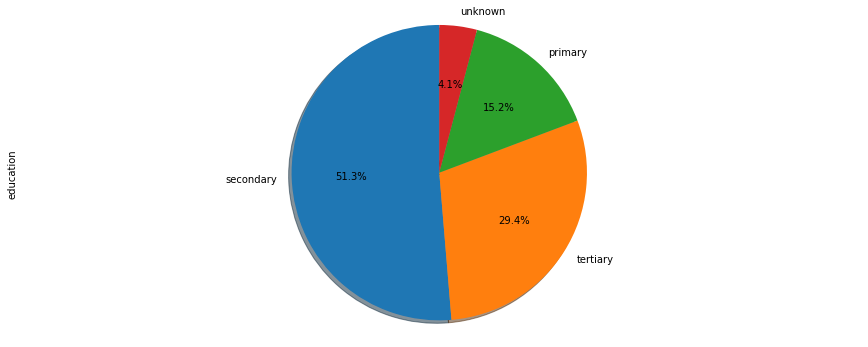

In [18]:
catVar = 'education'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

Secondary and tertiary education make up almost three quarters of the campaign population.  
Performing a side by side visual comparison of job and education shows the top 4 jobs align to the top 2 education levels.  Secondary level education is normally required for blue-collar, management and technician type jobs.

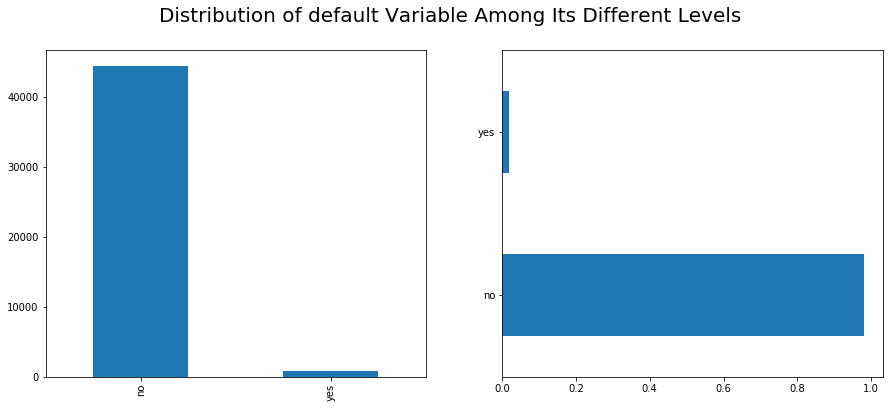

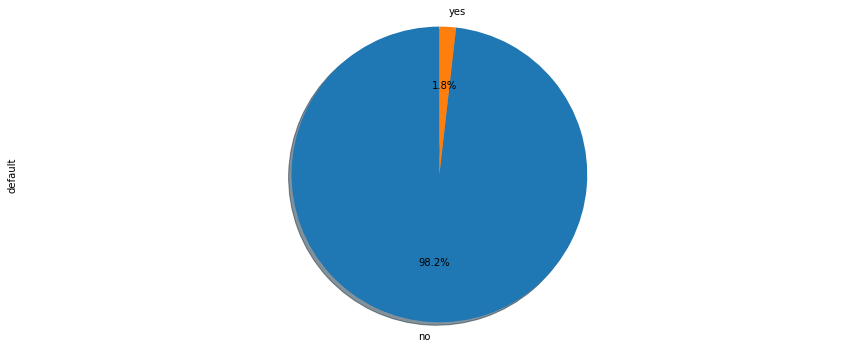

In [19]:
catVar = 'default'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

Overwhelmingly, the population does not have a default listing in their credit history.

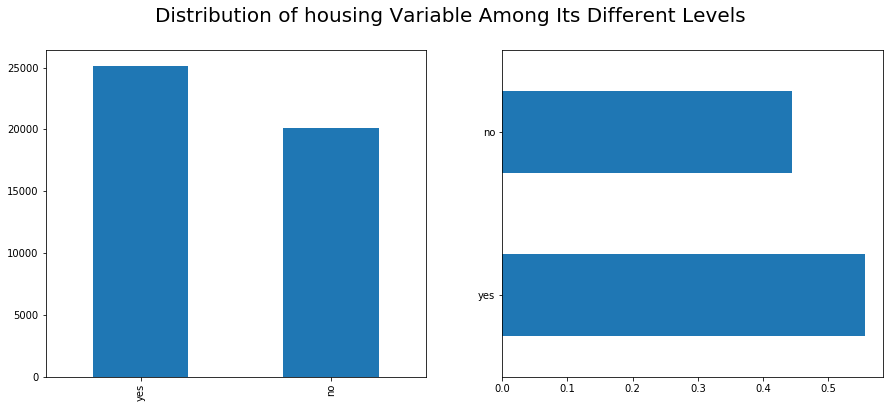

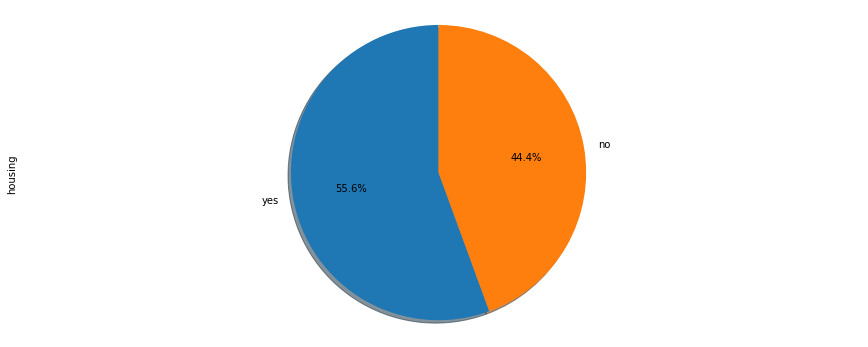

In [20]:
catVar = 'housing'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

The population is close to being split on currently having a home loan. 

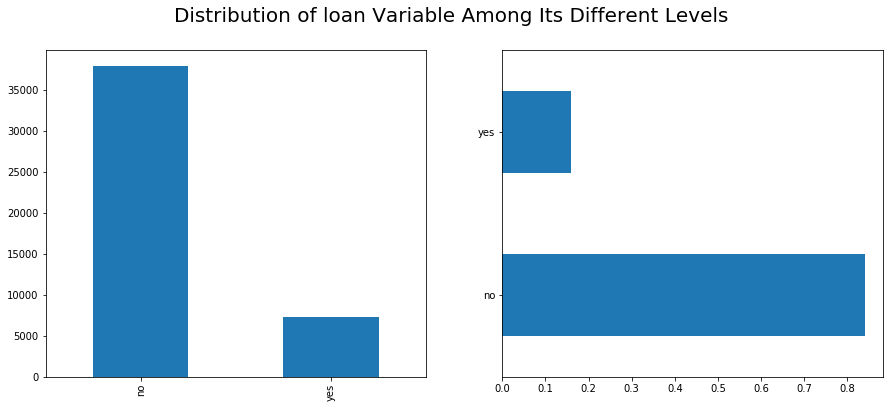

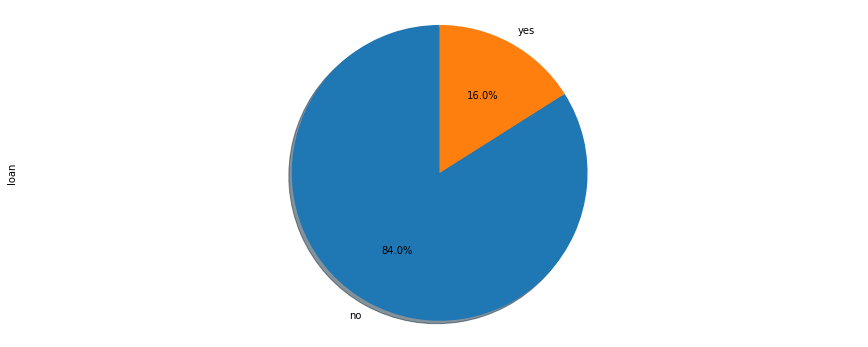

In [21]:
catVar = 'loan'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

Approximately 85% of the population does not have a personal loan.  

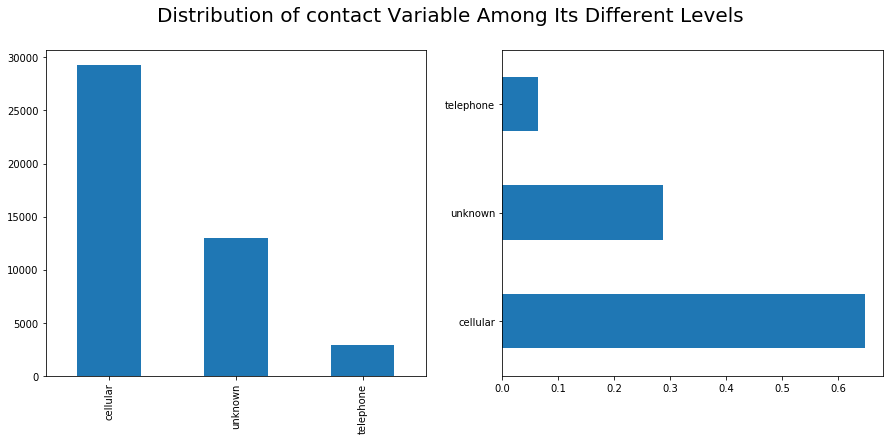

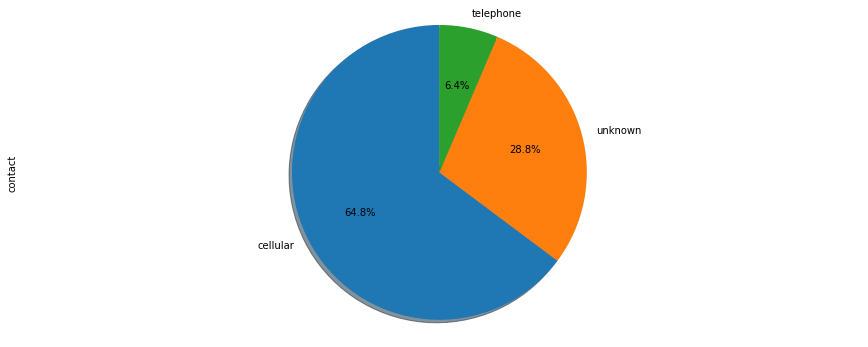

In [22]:
catVar = 'contact'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

Almost 30% of clients that have a method listed as unknown method of communication.  Nonetheless, our entire population was contacted by voice, either cellular or telephone, and none of the unknowns were performed by another communication method such as email.

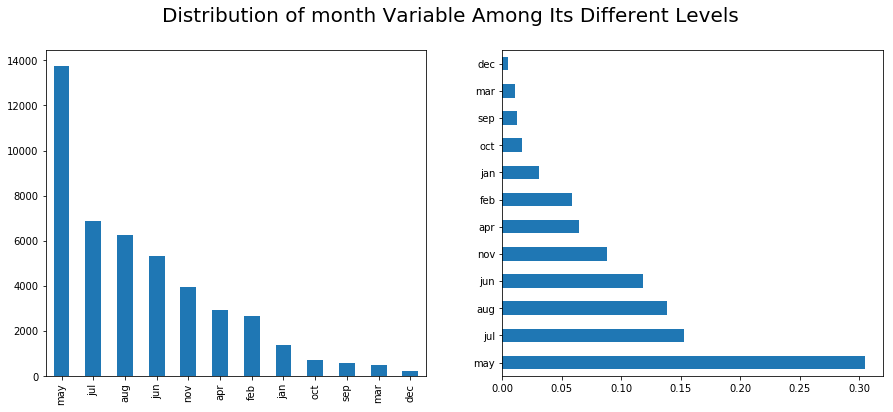

In [23]:
catVar = 'month'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
#fig, axes12 = plt.subplots(1,1,figsize=(15,6))
#bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
#axes12.axis('equal')
plt.show()

May, July, August and June make up almost 75% of the calls made.  Based on public Portugal holidays, the months with the most weekday work days appear to be March, May, June, July and August.  December and April have the most holidays which correspond to Christmas and Easter festivities (https://www.feiertagskalender.ch/index.php?geo=3516&jahr=2010&hl=en).

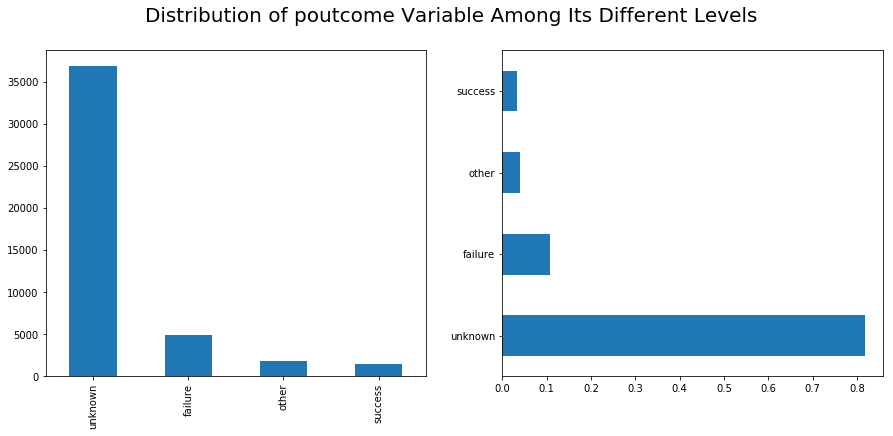

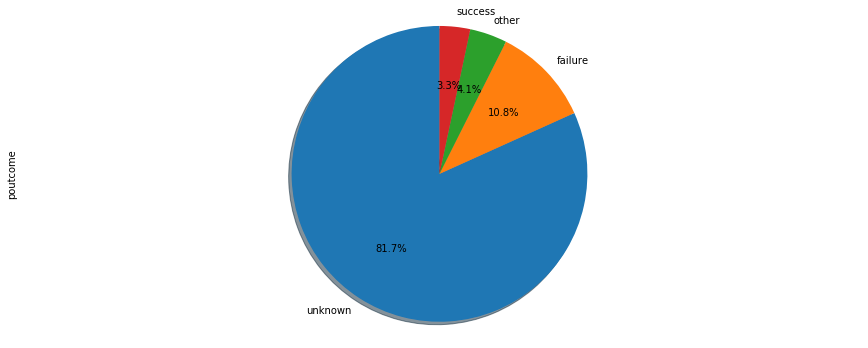

In [24]:
catVar = 'poutcome'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

Clients that have not been part of a previous marketing campaign were denoted by the term unknown.  Almost the entire makeup of this unkown portion are clients that have not particiapted before.

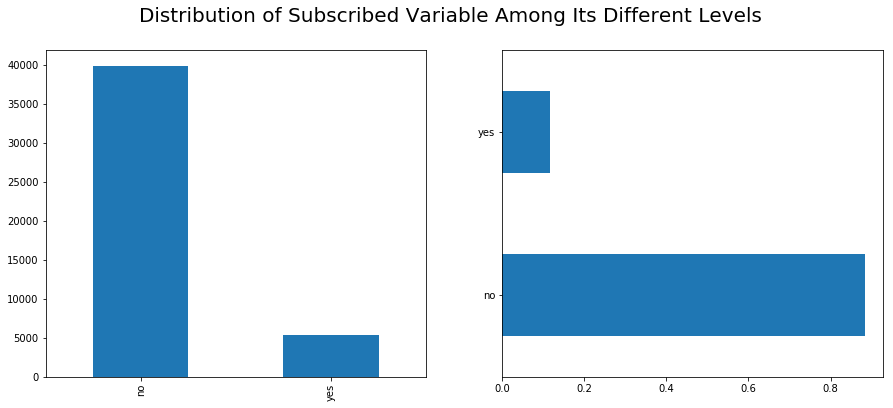

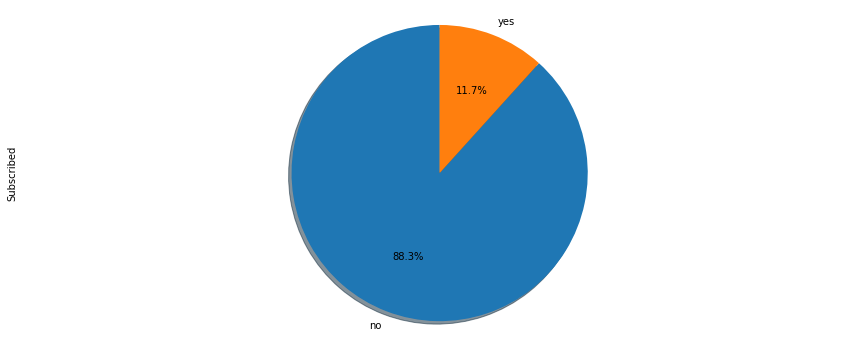

In [25]:
catVar = 'Subscribed'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

Despite the marketing efforts, almost 90% of the campaign population did not subscribe to the term deposit.

Text(0.5, 1.0, 'Targeted Age Group')

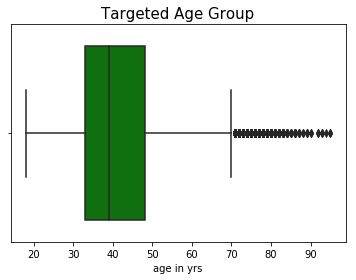

In [26]:
#Different age groups targeted for promotions

gAge = sns.boxplot(x='age', data=bankPromo_df , color="green")
gAge.set_xlabel("age in yrs")
gAge.set_title("Targeted Age Group", fontsize=15)

Bank promotion sample contains Adults only, minimum age of people contacted is 18. While the target age-group 18-70 yrs, we do see some outliers where people above 70 yrs were also called. Majority of the people called were in the age-group of 30-50, which form the working group.

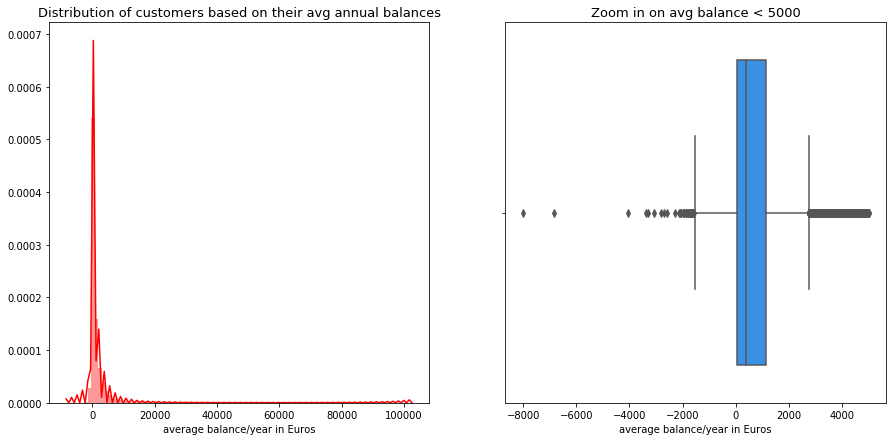

In [27]:
# visualizing average balance per year data for the people contacted for this promotion

fig = plt.figure(figsize=(15,7))

# since the range of balance is (-8000,100000), plotted normal distribution 
ax = plt.subplot(1,2,1)
gBal1 = sns.distplot(bankPromo_df['balance'], axlabel="average balance/year in Euros", bins=100, norm_hist=True, label="Density", ax = ax, color="red")

gBal1.set_title("Distribution of customers based on their avg annual balances", fontsize=13)
# to get approximate idea on majority of balances
ax = plt.subplot(1,2,2)
bankPromoSelBal_df = bankPromo_df[bankPromo_df['balance'] < 5000 ]
gBal2 =sns.boxplot(bankPromoSelBal_df['balance'], ax = ax , color="dodgerblue")

gBal2.set_xlabel("average balance/year in Euros")
gBal2.set_title("Zoom in on avg balance < 5000", fontsize=13)
plt.show()

Visualizing average balance per year of people contacted, shows a right-skewed density graph. Average balance range of  0 to 20000 is densely populated, with mild population on negative balances also. Very few people with average balance per year > 20000 were contacted. From the box plot it is very evident that 75% of people contacted are having average balance per year < 5000 Euros approx. Visualizing a boxplot for this subset of data with average balance per year < 5000 Euros, it is evident that 50% of people had average balance < 500 Euros, including negative balances and 75% people had an average balance per year lower than 1000 Euros.

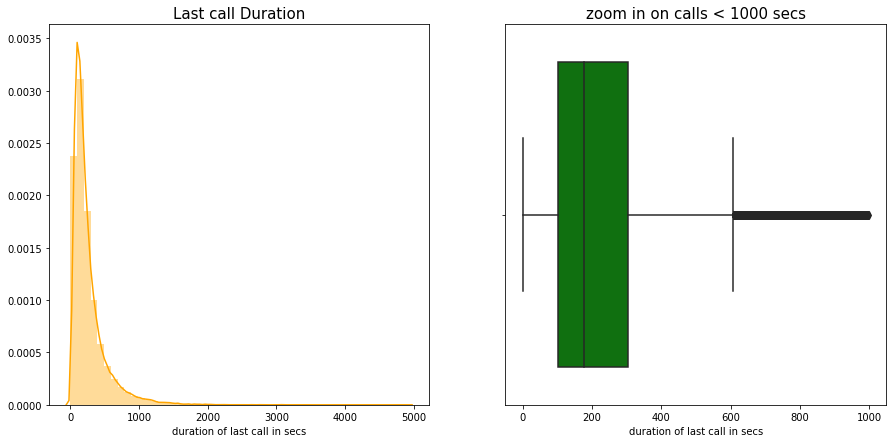

In [28]:
# visualizing duration of last call with the people contacted for this promotion

fig = plt.figure(figsize=(15,7))

# since the range of balance is (0,5000), plotted histogram
ax = plt.subplot(1,2,1)
gCalDur1 = sns.distplot(bankPromo_df['duration'], kde="False",  color="orange" , axlabel="duration of last call in secs")

gCalDur1.set_title("Last call Duration", fontsize=15)

# to get approximate idea on majority of balances
ax = plt.subplot(1,2,2)
bankPromoSelDur_df = bankPromo_df[bankPromo_df['duration'] < 1000 ]
gCalDur2 = sns.boxplot(bankPromoSelDur_df['duration'], ax = ax, color = "green")


gCalDur2.set_xlabel("duration of last call in secs")
gCalDur2.set_title("zoom in on calls < 1000 secs", fontsize=15)
plt.show()

Histogram of duration of last call for the data gathered shows a right skewed plot , with majority of calls having a duration of < 1000 secs ( approx 16 mins ).
However we do see some people showed lot of interest and continued to talk for as long as 5000 secs ( approx 80 mins ). On creating a boxplot on this subset of data where calls are < 1000 secs, it is evident that 50% of the calls did not last 200 secs ( approx 3 mins ) and 75% calls lasted around 300 secs i.e. 5 mins.

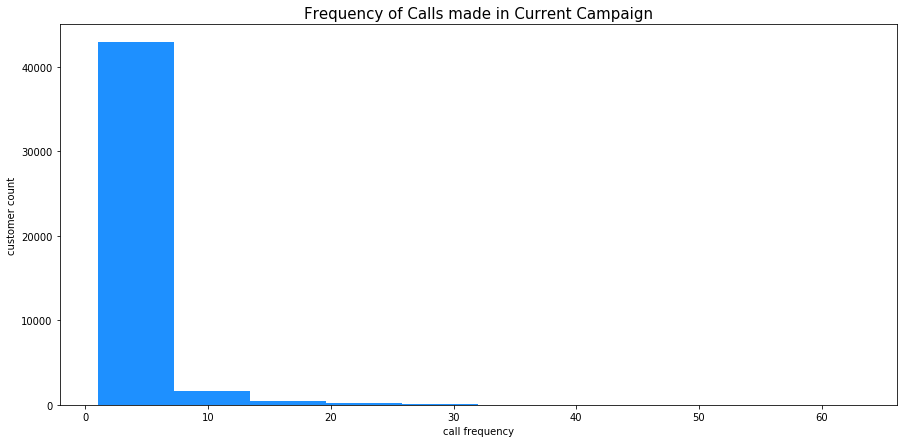

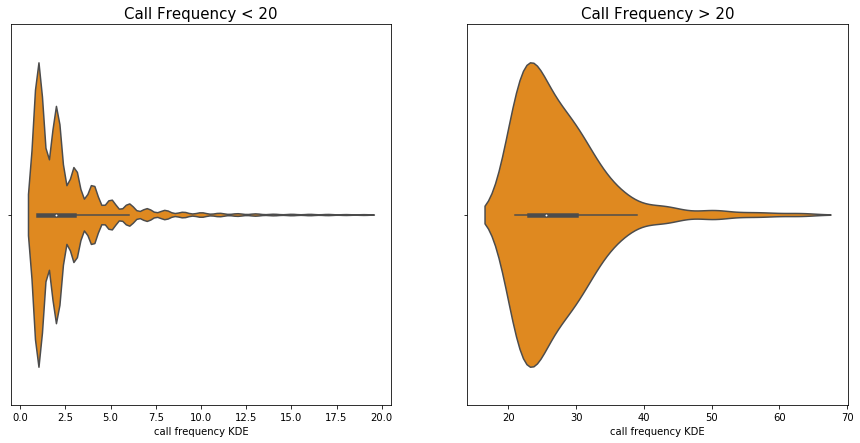

In [29]:
# visualizing number of times same person contacted during current campaign

fig = plt.figure(figsize=(15,7))

plt.hist(bankPromo_df['campaign'], color = "dodgerblue")
plt.title("Frequency of Calls made in Current Campaign", fontsize=15)
plt.xlabel("call frequency")
plt.ylabel("customer count")
plt.show()

#lets have a closer look at the distribution of # of calls > 20 and # of calls < 20 to get a better picture
# plot subset for # of times contacted < 20 in this campaign
fig = plt.figure(figsize=(15,7))

ax = plt.subplot(1,2,1)
bankPromoSelCam1_df = bankPromo_df[bankPromo_df['campaign'] < 20]
gCallFreq1 = sns.violinplot(bankPromoSelCam1_df['campaign'], color = "darkorange",ax = ax )

gCallFreq1.set_xlabel("call frequency KDE")
gCallFreq1.set_title("Call Frequency < 20", fontsize=15)
# plot subset for # of times contacted > 20 in this campaign
ax = plt.subplot(1,2,2)
bankPromoSelCam2_df = bankPromo_df[bankPromo_df['campaign'] > 20]
gCallFreq2 = sns.violinplot(bankPromoSelCam2_df['campaign'], color = "darkorange",ax = ax )

gCallFreq2.set_xlabel("call frequency KDE")
gCallFreq2.set_title("Call Frequency > 20", fontsize=15)
plt.show()

Simple histogram of number of times same person is contacted in the current campaign shows mostly everyone was called < 10 times. Considering the number of records in the dataset, extremely less number of people were called more than 20 times during current campaign. To get a better picture , violin plot is constructed by dividing the data based on number of calls made < 20 times or > 20. It is evident that majority of people called in the range of < 20 times have a mean of approx < 2.5 , since number of calls is a whole number, we take floor value and approximate this to 2 times only.Very few people were called more than 5 times . Looking at the smaller subset of people who were called more than 20 times, few more people called 20-30 times and extremely low count of people who were called more than 40 times. 

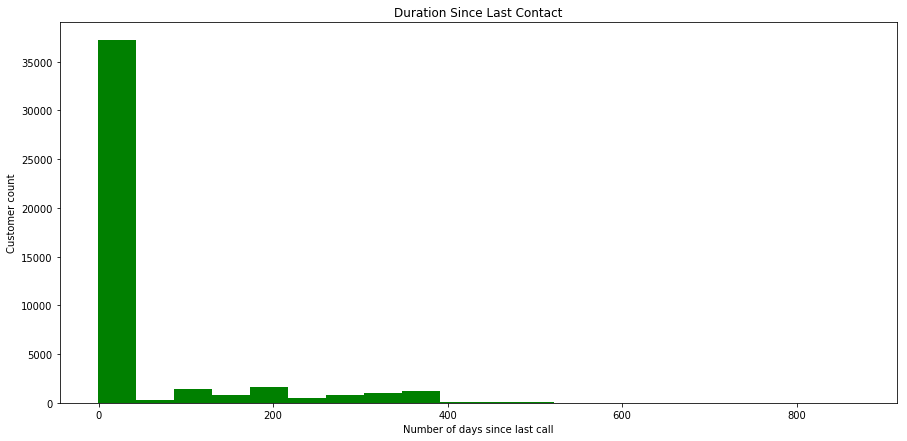

In [30]:
# visualizing number of days after last contact from previous campaign , called again for the current campaign

fig = plt.figure(figsize=(15,7))

plt.hist(bankPromo_df['pdays'], color = "green" , bins=int(20))
plt.xlabel("Number of days since last call")
plt.ylabel("Customer count")
plt.title("Duration Since Last Contact")
plt.show()

As previously discussed we have a large section of "unknown" outcomes from previous campaigns , more than 35K callers are new listers , who have not been contacted in previous campaigns. It will be interesting to check the approx 8K callers who were called previously, if there is any difference in the outcome from previous campaign as compared to outcome from this campaign.

# Explore Joint Attributes

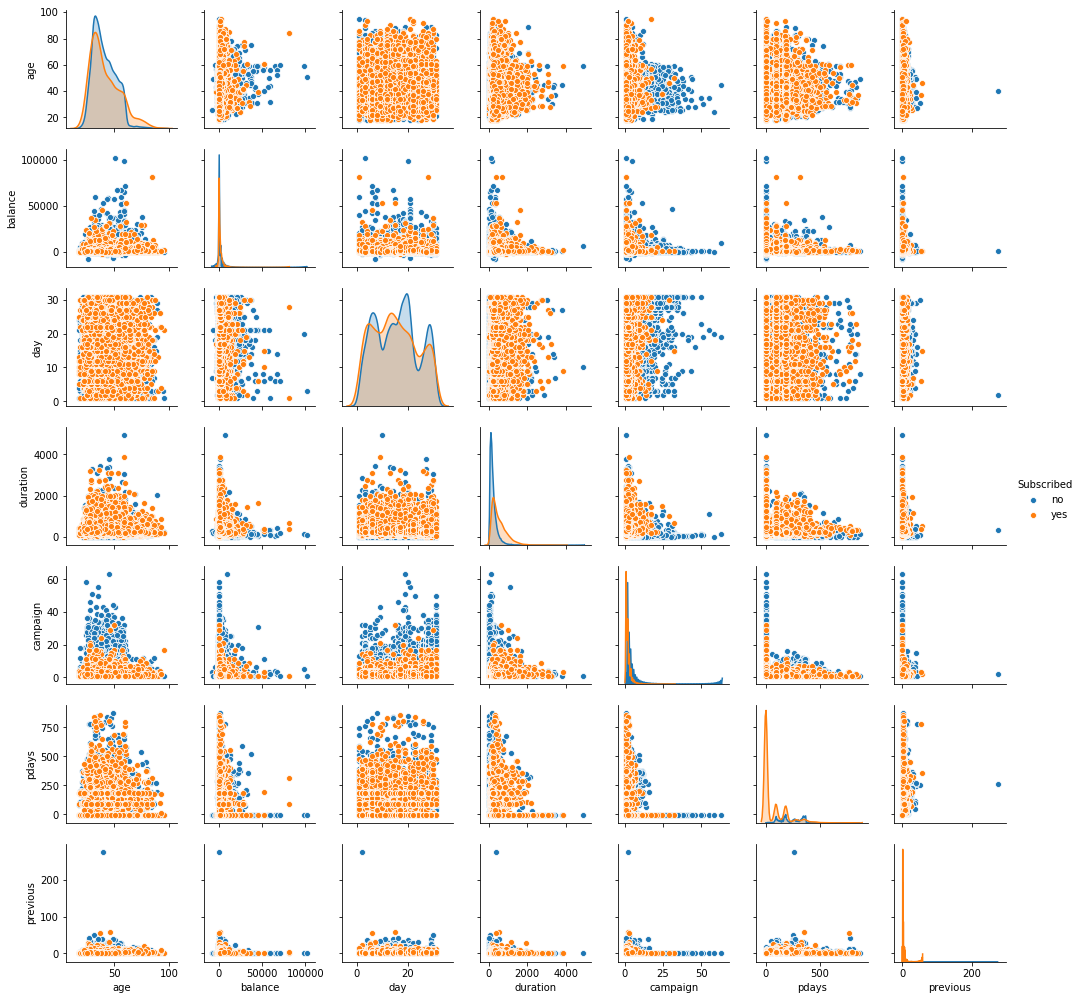

In [31]:
sns.pairplot(data = bankPromo_df, hue = "Subscribed", height = 2)

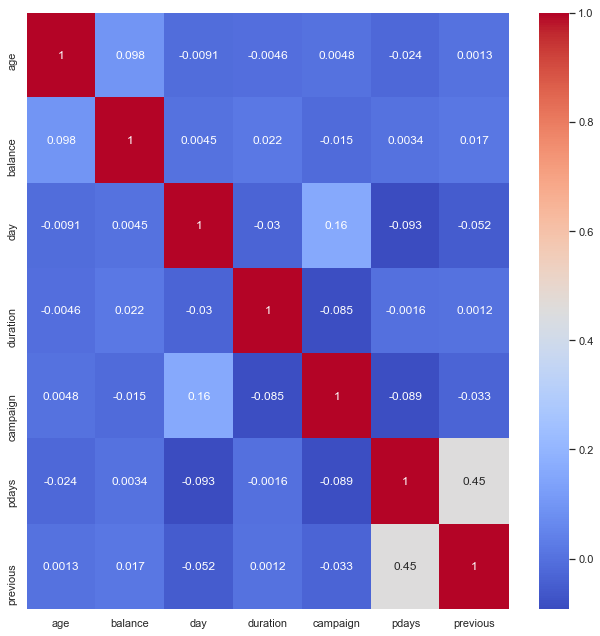

In [32]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(bankPromo_df.corr(), cmap="coolwarm", annot=True)
f.tight_layout()

As seen from above heatmap of correlation among numerical variables, none of pair of numerical varibales have significant,non-weak linear correlation among them except for correlation between (pdays and previous)(value 0.45). Next we would explore this correlation.

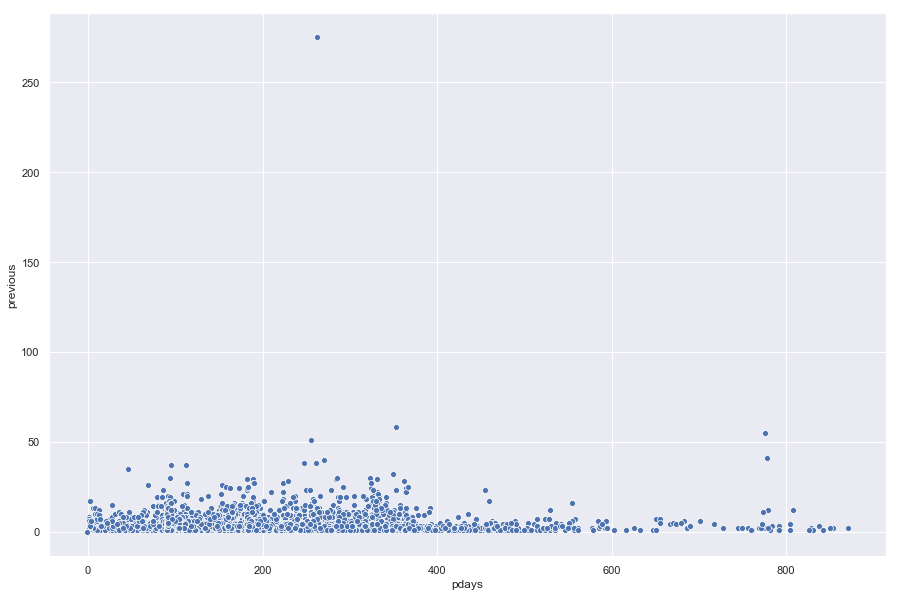

In [33]:
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=bankPromo_df, x="pdays", y="previous", )

Outliers present in the "previous" variable are obscuring the visualization of true relationship between these two variables. Hence, viewing this relationship after removing these outlier values for previous variable ( value > 50 ).

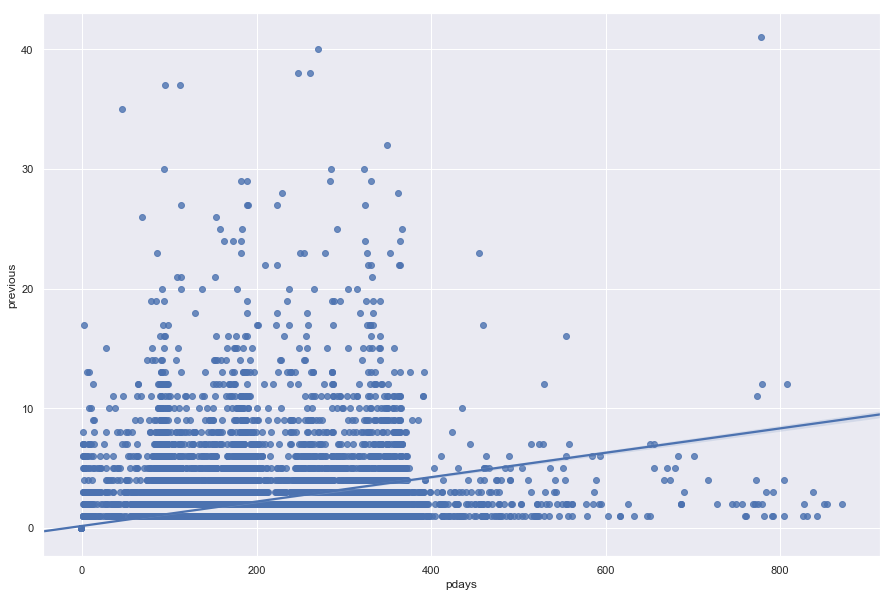

In [34]:
f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(data=bankPromo_df.drop(index = bankPromo_df[bankPromo_df['previous'] > 50].index, axis = 0), x="pdays",y="previous")

As seen from above plot, correlation between these variables appear to be relatively strong for pdays < 400 and moderately weak for pdays > 400. 

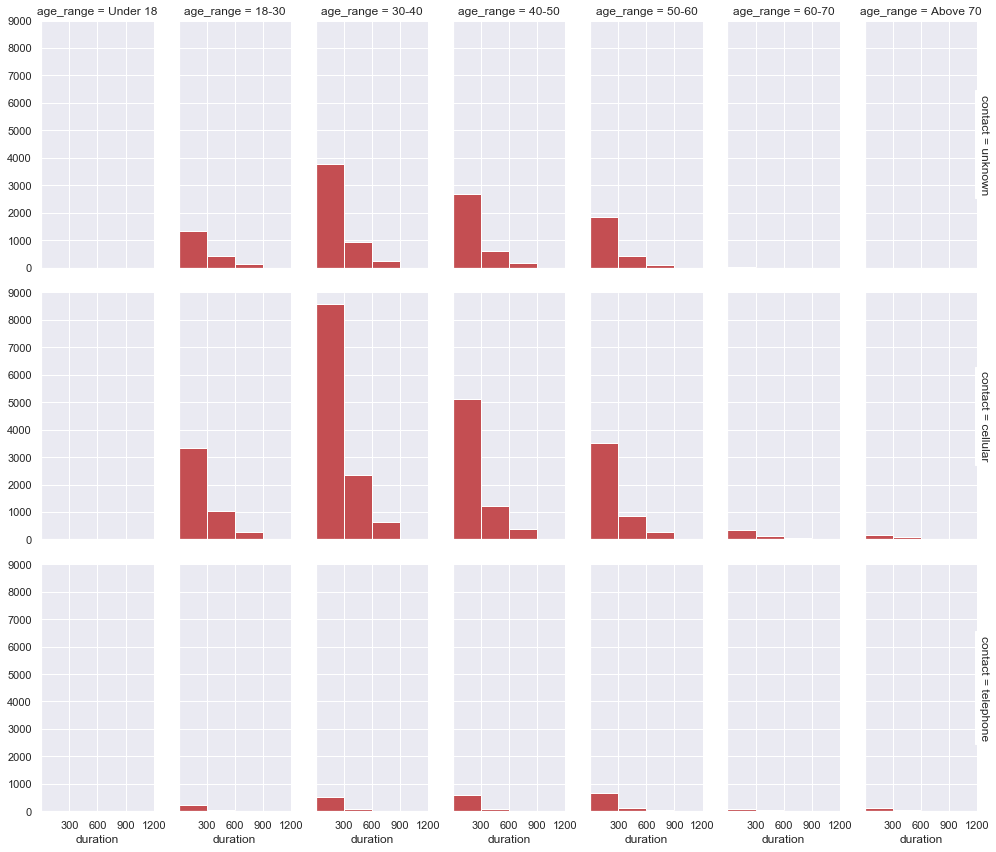

In [35]:
visDf['age_range'] = pd.cut(visDf.age,[0,18,30,40,50,60,70,1e6],3,labels=['Under 18','18-30','30-40','40-50','50-60','60-70','Above 70']) # this creates a new variable
sns.set(style="darkgrid")
g = sns.FacetGrid(visDf, col="age_range", row="contact", margin_titles=True, height = 4, aspect = 0.5)
g = g.map(plt.hist, "duration", bins = np.arange(0,1200,300), color="r").set(xlim=(0,1200), xticks=[300, 600, 900, 1200])

Some interesting obervations that are observed from above graph between age_range vs contact type vs call duration are as:
1. There are no clients under the age of 18 since they are disqualified from obtaining a term deposit in their name.  Above 60 is under-represented in our dataset. Most of the calls that were made were to people between Age range of 18 - 60. This is intiutive since people in this prime age range would be more likely to subscibe to promotion for new savings account. Average retirement age in Portugal in 65 years old for both men and women and the bank could have skewed their calls to more clients that are not on fixed incomes (https://tradingeconomics.com/portugal/retirement-age-men and https://tradingeconomics.com/portugal/retirement-age-women)
2. Most calls that ended more than 300sec or 5 mins, were made to people of age range between 18-60 and on their cell phones or via unknown medium. 

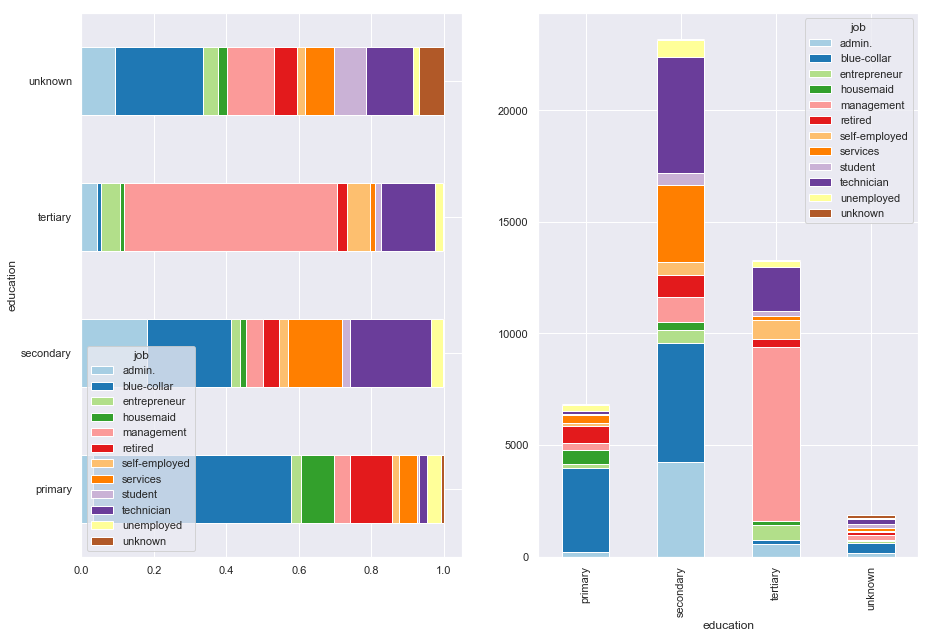

In [38]:
fig15, axes_educationVar = plt.subplots(1,2,figsize=(15,10))

Subscribed_Table = pd.crosstab([ visDf['education'] ],visDf['job'])

Subscribed_Proportion = Subscribed_Table.div(Subscribed_Table.sum(1).astype(float), axis=0)

Subscribed_Proportion.plot(kind='barh',

stacked=True, ax = axes_educationVar[0], colormap = "Paired")

Subscribed_Table.plot(kind='bar', stacked=True, ax = axes_educationVar[1], colormap = "Paired")

Key observations from the plots:-

- Significant portion of people with primary education have blue-collar jobs

- Significant portion of people not in blue collar jobs are people with secondary and tertiary education

- People with tertiary education are in management position and very few are in blue collar jobs

- Number of people unemployed with secondary education is more compared to those with primary or tertiary education

#### Age vs debt

<Figure size 1080x720 with 0 Axes>

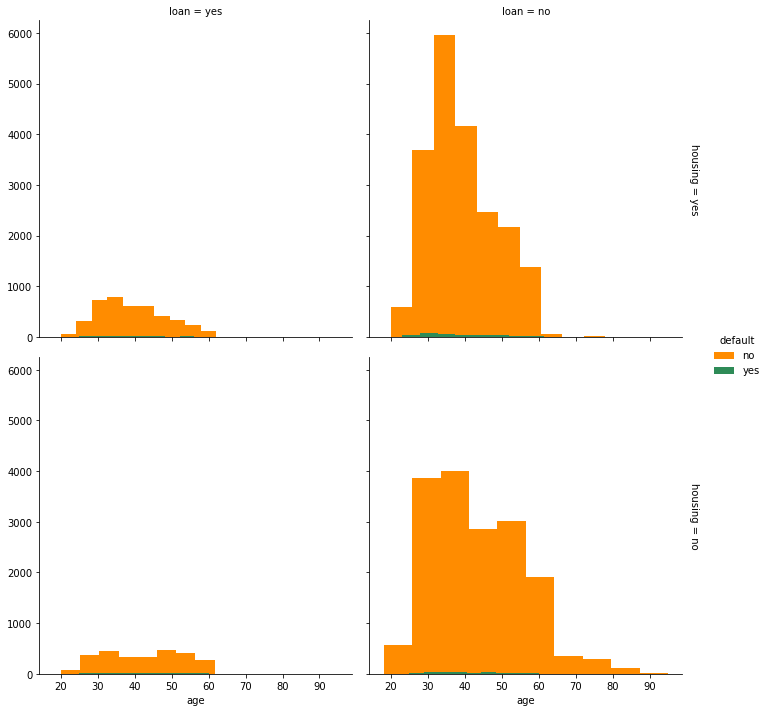

In [47]:
# Explore economic health of customers based on any loans( housing or personal), default status of customer and age group
fig = plt.figure(figsize=(15,10))
fig.suptitle("Age vs debt", fontsize=20)

pal = dict(yes="seagreen",no="darkorange")
ghist = sns.FacetGrid(bankPromo_df, col="loan" , row = "housing", hue="default", margin_titles=True, 
                      row_order=["yes","no"], col_order=["yes","no"],
                     palette = pal, height=5)
ghist.map(plt.hist, "age")
ghist.add_legend()

plt.show()

Majority of the people contacted for this promotion is age group 30-60 yrs. Defaulters seem to be very few.  Also interesting to note will be most of the people contacted for this promotion either had no loans or had a housing loan. It is visibly evident that contact list contains comparatively very few people with personal loans.  Housing loans are comparatively safer since they have a mortgageable property attached.  People with personal loans fall under the age group of 60,i.e. not-retired class.

#### Age vs Economics of Contacs

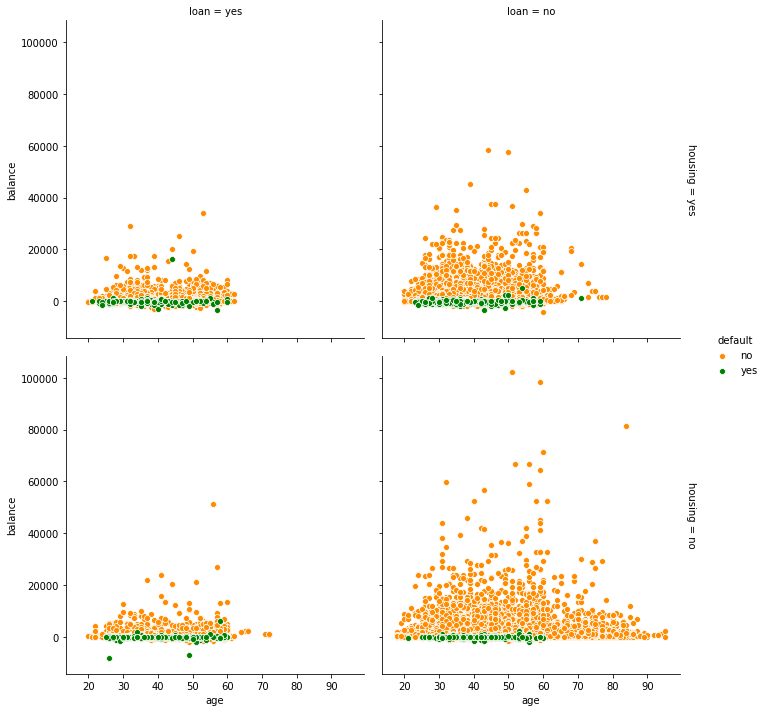

In [44]:
## Explore economic health of customers based on any loans( housing or personal), default status of customer and annual average balances

pal = dict(yes="green",no="darkorange")
g = sns.FacetGrid(bankPromo_df, col="loan" , row = "housing", hue="default", margin_titles=True,
                  row_order=["yes","no"], col_order=["yes","no"],
                 palette=pal,height=5)
g.map(sns.scatterplot, "age","balance")
g.add_legend()

Very few people in the retired age group and having a personal loan are selected for this promo. List does not include people with average balance > 60K and having any kind of loan. Or it could be possible that people with that much of savings do not need any kind of debt and so there is none in the target list. It will be interesting to find average cost of houses and cost of living in Portugal in the year 2008-2010.
Another visible point here is very few defaulters are in the retired age group i.e. older than 60 yrs, atleast not with negative balances in their account.

# Explore Attributes and Class

#### Duration of Last Call compared to Subscription outcome

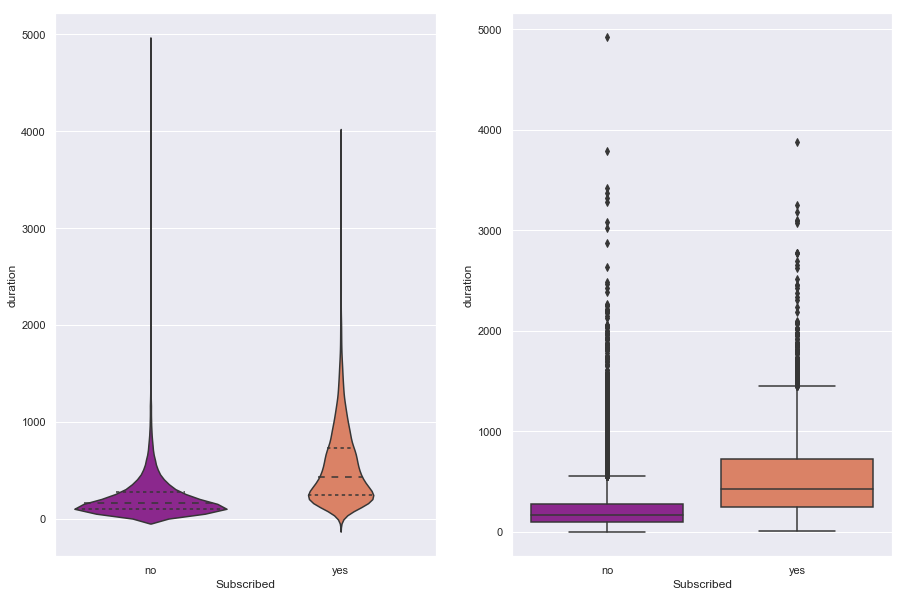

In [38]:
sns.set(style="darkgrid")
fig11, ax_durationVar = plt.subplots(nrows = 1, ncols = 2, figsize = (15,10))
sns.violinplot(data = bankPromo_df, x = "Subscribed", y = "duration", ax = ax_durationVar[0], \
               palette="plasma",inner="quartile")
sns.boxplot(data = bankPromo_df, x = "Subscribed" , y ="duration", ax = ax_durationVar[1], palette="plasma")

As seen from above plots depicting distribution of "duration" variable against class variable "Subscribed", although the spread of duration across both levels of class is right skewed, long tailed distribution, most of the data is packed relatively tightly in "No" level as compared to "Yes" level. **A higher median for duration variable in "Yes" level as compared to "No" level reveals that the people who are subscribing to promotion tend to have higher call durations. This is intuitive since generally, people who want subscribe to promotion want more information on the offering and providing all such details generally takes time for representative, resulting in higher call durations.
Based upon the argument put forward above, "duration" could be a good predictor variable in predicting whether people will subscibe or not to promotion offering.** 

#### Age of client compared to job

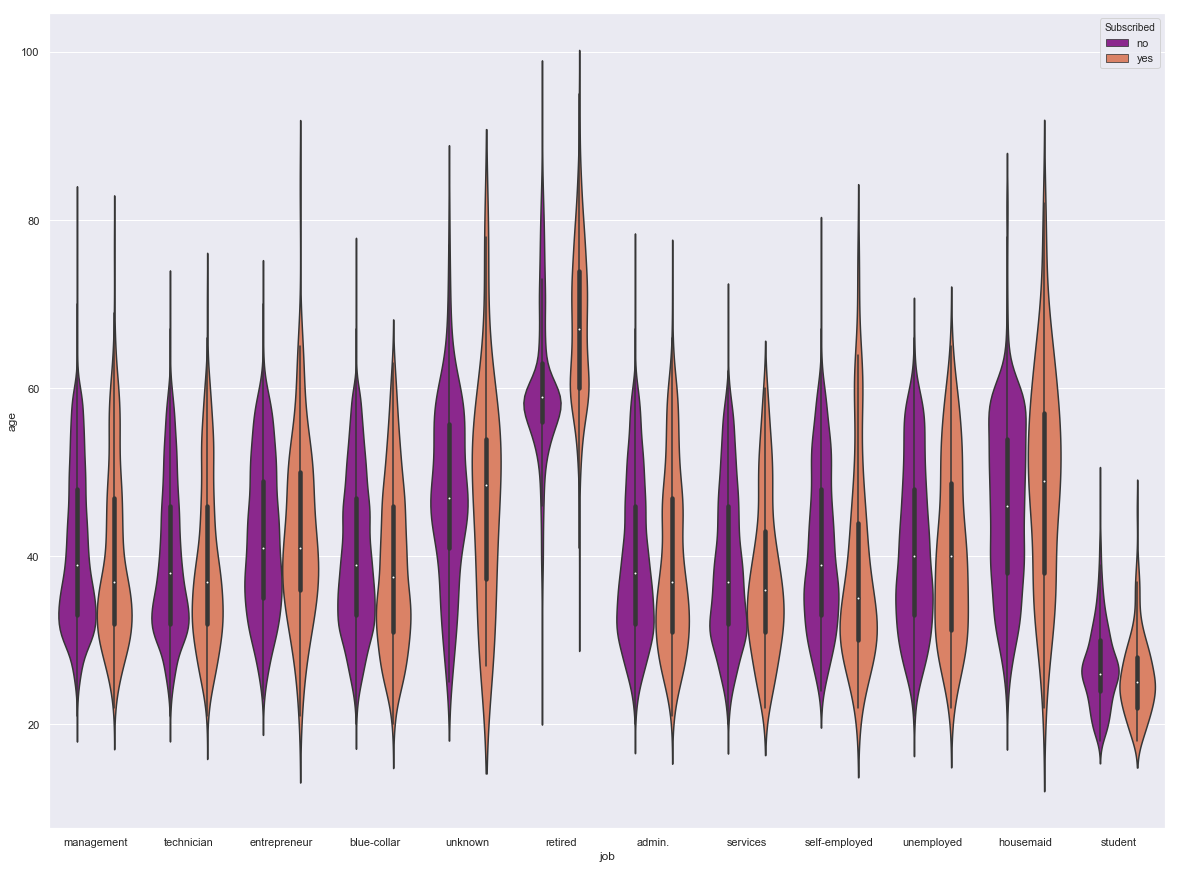

In [39]:
sns.set(style="darkgrid")
fig12, ax_ageVar = plt.subplots(figsize = (20,15))
#sns.violinplot(data = bankPromo_df, x = "Subscribed", y = "age", \
#               palette="plasma")
sns.violinplot(data = bankPromo_df, x = "job", y = "age", hue="Subscribed", \
               palette="plasma")

The key observations from the visualization of age vs job vs Subscribed(class variable) are:
1. People who are retired from job and have median age around 70 are more likely to subscribe to the promotion than group of retired people who have median age less than 60. This could very well be likely that as people get older they want to save more for inheritance purposes or for future medical expenditures.
2. Older housemaids are more likely to subscribe to the bank promotion than relatively younger housemaids.
3. Self Employed People less than 40 years of age are more likely to subscribe to the promotion than people who are self employed but more than 40 years of age.

#### Housing with Age range compared to Subscribed outcome

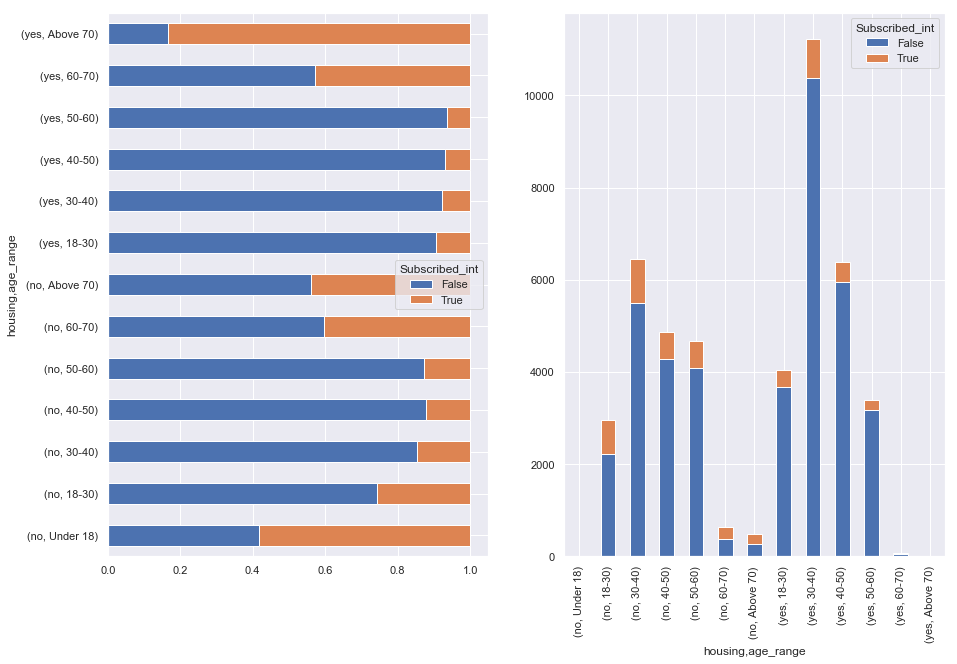

In [40]:
fig13, axes_housingVar = plt.subplots(1,2,figsize=(15,10))

Subscribed_Table = pd.crosstab([ visDf['housing'],visDf['age_range'] ], 
                       visDf.Subscribed_int.astype(bool))
Subscribed_Proportion = Subscribed_Table.div(Subscribed_Table.sum(1).astype(float), axis=0)

Subscribed_Proportion.plot(kind='barh', 
                   stacked=True, ax = axes_housingVar[0])

Subscribed_Table.plot(kind='bar', stacked=True, ax = axes_housingVar[1])

As seen from above charts, people over 60 years of age, although under represented in dataset, are more willing to subscribe to promotion even if they have taken housing loan. This trend is not observed in people who are 60 and less and have taken home loans.  

#### Subscribed compared to housing, without age range

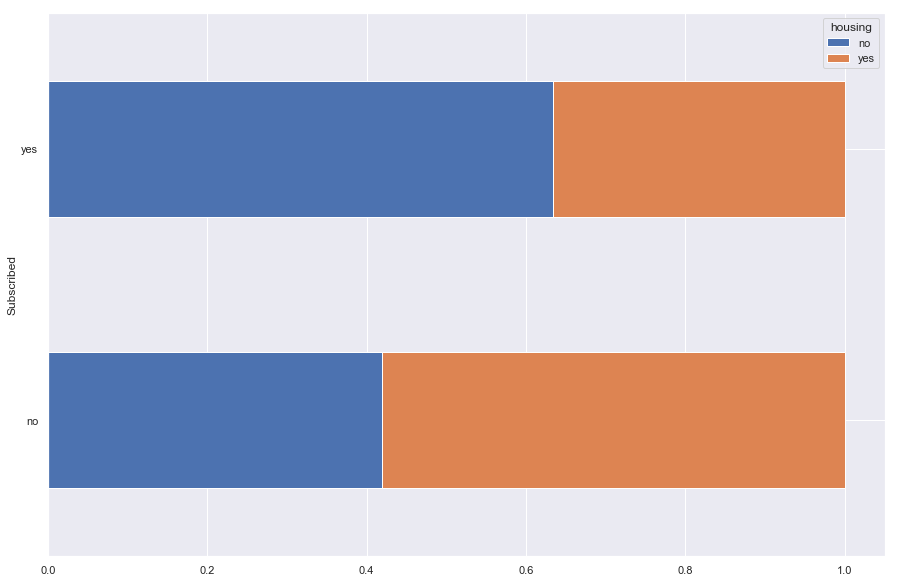

In [41]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
SubsHousingPropDf = pd.crosstab(visDf['housing'], visDf['Subscribed'], margins=True)
SubsHousingPropDf['no'] = SubsHousingPropDf['no'] / SubsHousingPropDf.loc['All', 'no']
SubsHousingPropDf['yes'] = SubsHousingPropDf['yes'] / SubsHousingPropDf.loc['All', 'yes']
SubsHousingPropDf.drop(columns='All', axis = 1).drop(index ='All', axis=0).transpose().plot(kind='barh', \
                                                                                          stacked = True,ax=ax)

As seen from the above normalized stacked bar graph that out of total proportion of people who have subscribed to the promotion, a greater proportion of these people donot have housing loan. Whereas, out of all people who didnt subscribe to promotion, a greater proportion of these people have home loan commitment. This is intuitive since people with more disposable income would consider an promotional offer for savings account. 

#### Education and job as compared to Subscribed outcome

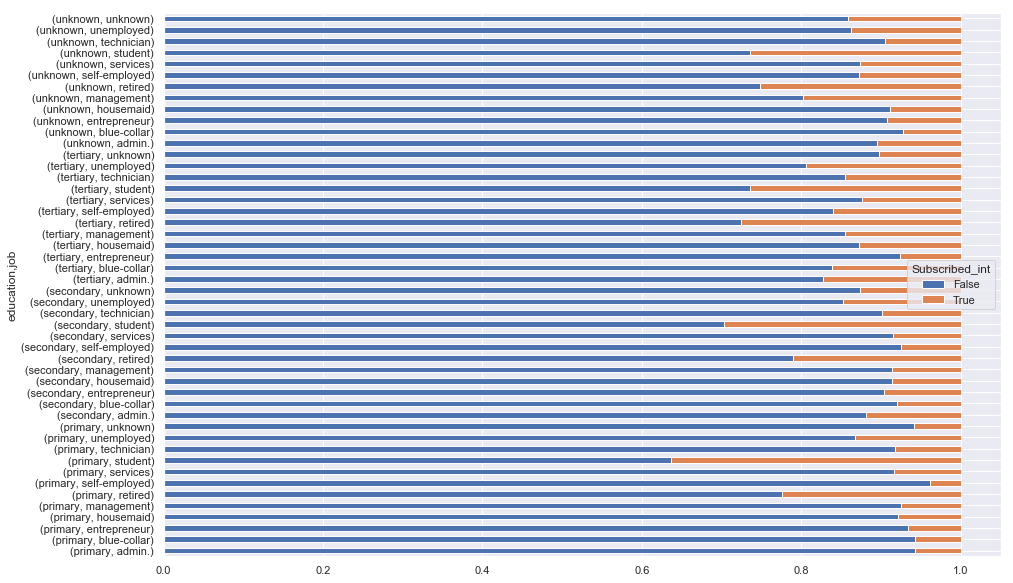

In [42]:
fig18, axes_educationjobVar = plt.subplots(figsize=(15,10))

Subscribed_Table = pd.crosstab([ visDf['education'],visDf['job'] ],

visDf.Subscribed_int.astype(bool))

Subscribed_Proportion = Subscribed_Table.div(Subscribed_Table.sum(1).astype(float), axis=0)

Subscribed_Proportion.plot(kind='barh',

stacked=True, ax = axes_educationjobVar)

Key Observations from the plots:-

- Chances of students with primary, secondary or tertiary education to subscribe is more likely than other job, education categories

- Chances of self employed with primary education is least likely to subscribe, compared to other job education categories

- After students, chances of retired people with tertiary education subscribing is higher compared to other people who are not students

#### Balance compared to subscribed outcome

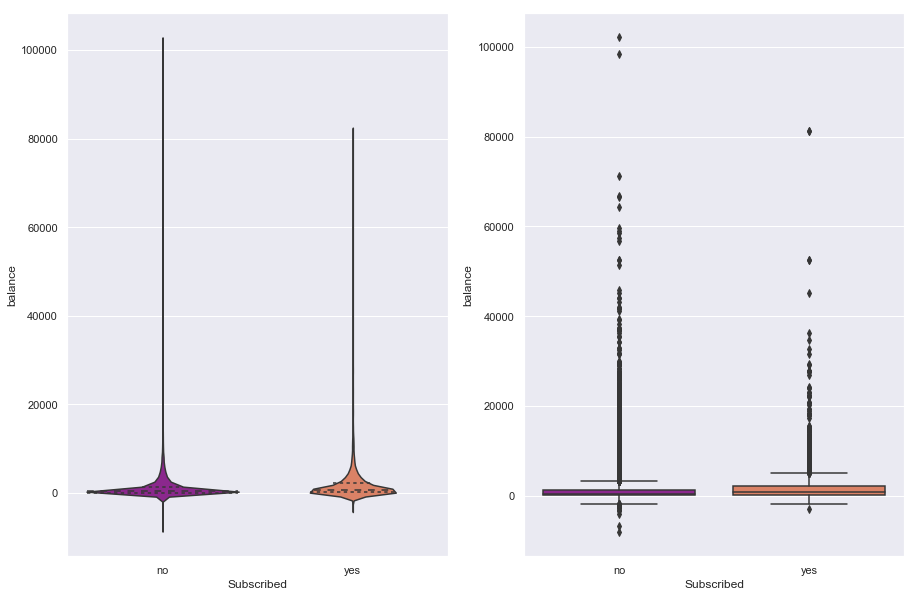

In [43]:
sns.set(style="darkgrid")

fig13, ax_balanceVar = plt.subplots(nrows = 1, ncols = 2, figsize = (15,10))

sns.violinplot(data = bankPromo_df, x = "Subscribed", y = "balance", ax = ax_balanceVar[0], \

palette="plasma",inner="quartile")

sns.boxplot(data = bankPromo_df, x = "Subscribed" , y ="balance", ax = ax_balanceVar[1], palette="plasma")

Based on the visual examination of distribution of attribute 'balance' against class variable 'Subscribed', the spread is right skewed for people who subscribed and both right and left skewed for clients who did not subscribe. As expected, the median of yearly average balance for people who subscribed to term deposit is more compared who did not subscribe. 16% of people who were contacted had negative balance. More clients who had negative balance did not subscribe compared to those who subscribed. 'Balance' could be used as good predictor for someone who would not subscribe. Balance alone may not be sufficient to determine if someone will subscribe.

#### Debt and age range as compared to subscirbed outcome
Debt has been defined as any type of loan i.e. personal or housing.

Text(0.5,1,'Debt v/s Subscribed across different average balances')

<Figure size 1080x720 with 0 Axes>

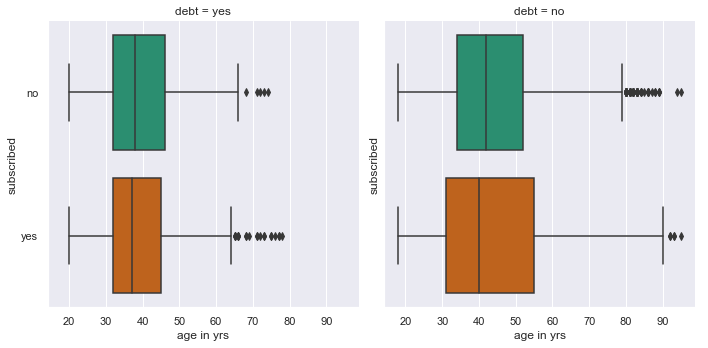

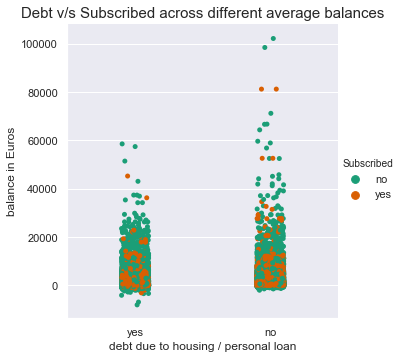

In [56]:
#create a new feature 'debt' if there is any kind of loan i.e. personal or housing loan
bankPromo_df['debt'] = bankPromo_df.apply(lambda row: 'yes' if (row.housing == "yes" or row.loan == "yes") else 'no', axis=1)

# create a plot on debt, default with balance and age on number of people Subscribed or not
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(15,10))


sns.set_palette("Dark2")

g1 = sns.catplot(x="age", y="Subscribed", col="debt", kind="box", data=bankPromo_df,legend=True )
g1.set(xlabel='age in yrs', ylabel='subscribed')


g2 = sns.catplot(y="balance", hue="Subscribed", x="debt", kind="strip", data=bankPromo_df,legend_out=True )
g2.set(ylabel='balance in Euros', xlabel='debt due to housing / personal loan')
plt.title("Debt v/s Subscribed across different average balances", fontsize=15)


Majority of people contacted for this bank promotion is clearly the population with average balance per year lower than 50K Euros. We have very few clients with higher average balance. Majority of these high savers do not subscribe. So this can be a supportive feature if not a very important one. Only 2 high savers ( average balance per year > 60K ) has subscribed. Out of the very few people with negative balances, 1 or 2 have only subscribed.  
Clearly, clients of all age group have subscribed , so age does not seem to be a very strong feature. 
Clients above age 60 have no kind of debt.
 Having debt does not seem to be a huge factor in choosing to subscribe. More debt-free people have subscribed but then we have a evident group of people under any kind of debt who have also subscribed. So the differences do not look drastic.

#### Subscribed outcome as compared to customers in previous marketing compaigns

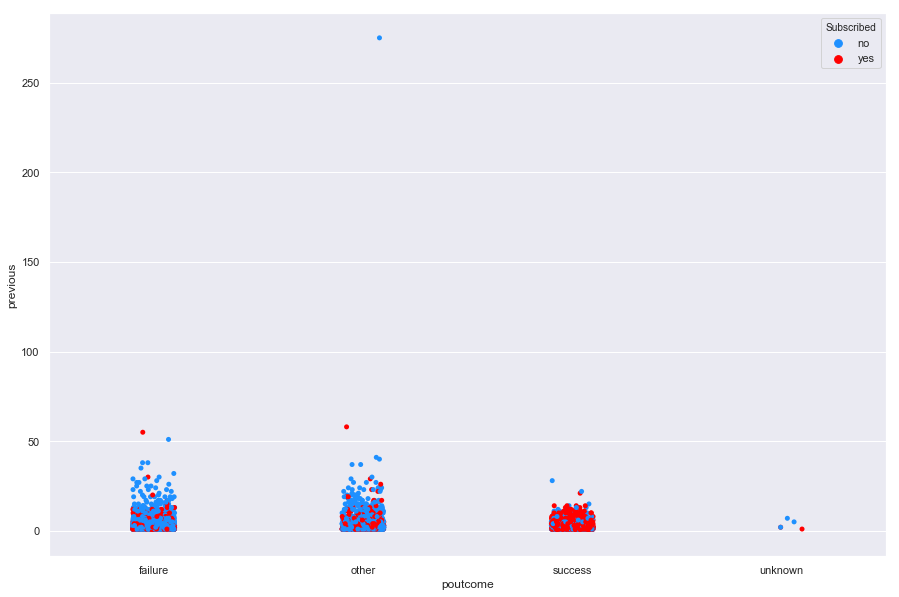

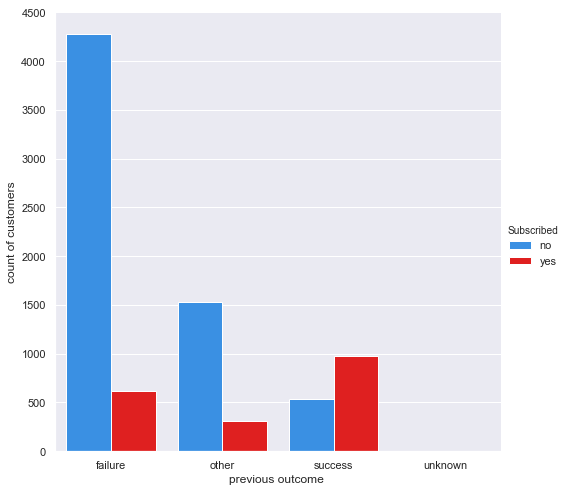

In [70]:
# Subscribe status of old customers contacted again during Current Campaign

pal = dict(yes="red",no="dodgerblue")
fig = plt.figure(figsize=(15,10))

# Customers not contacted are identified by previous=0
bankPromoSelPrev_df = bankPromo_df[bankPromo_df['previous'] > 0 ]
sns.stripplot(x="poutcome", y="previous" , hue="Subscribed", data=bankPromoSelPrev_df,jitter=True,palette = pal)
plt.show()


# Zoom in without the single outlier
bankPromoSelPrev_df1 = bankPromoSelPrev_df[bankPromoSelPrev_df['previous'] < 200]
gPrevCust = sns.catplot(x="poutcome" , hue="Subscribed", data=bankPromoSelPrev_df1,palette=pal, kind="count",height=7)

gPrevCust.set_ylabels("count of customers")
gPrevCust.set_xlabels("previous outcome ")
gPrevCust.set_titles("Old customers")


Very few unknowns/ undecided outcomes from the previous campaign . Almost 2/3rds of old customers with previous success outcome , subscribed again. This means customers lost during this campaign is 1/3rd of this group ( ~ 500 customers ). Almost 1/10th of the failure group, again approximating to 500 customers from the previous failed campaign subscribed this time. Few from the undecided group of previous campaing subscribed in current campaign but majority of that group decided to not subscribe. There does not seem to be a considerable advantage of contacting people from previous campaign. 

# New Features

To add additional context to this data, having data sets such as:
1. Average income by profession
2. Year call was made
3. Political climate
4. City client is in
5. Client has dependent childern

To include these types of additional data the team could dive deeper into the demographic of the Portuguese citizen.  Examples of this would be knowing the city in which the client is in the team could determine whether different parts of the country were hit harder with decline in the country's market.  Knowing details of average income, the team could determine if groups within a profession weathered the recession better than others.

The prediction data set has the following additional features.
- employment variation rate - quarterly indicator (numeric)
- consumer price index - monthly indicator (numeric) 
- cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

We can find the values for these features and add it to the training set.

# Exceptional Work

For this section, we would be performing the PCA and LDA to visualize the data across transformed axis as produced by PCA and LDA. The following approach would be taken:

1. Perform the PCA first with only numeric variables and without any Categorical Variables.
2. Categorical variables with One hot encoding will be introduced second into the PCA to see whether inclusion of extra information in terms of these variables lead to better seperation between class categories.
3. Since, PCA focuses on finding componenets that maximize spread in the data and not on maximizing the class seperation, we would run the LDA to see if it does a better job than PCA in seperating the calss categories in our dataset.  

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Make a copy of original data frame
bankPromoPCA_Df = bankPromo_df.copy()
bankPromoPCA_Df['Target'] = bankPromoPCA_Df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoPCA_Df['Target'] = bankPromoPCA_Df['Target'].astype(np.int)

# Drop all the categorical variables in the data frame for first analysis
bankPromoPCA_Df.drop(categoricalVars, inplace=True, axis=1)

bankPromoPCA_Df.head()


,age,balance,day,duration,campaign,pdays,previous,Target
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0


In [45]:
# Standardize ( centered and normalized) all numeric variables in the data set since "balance" variable
# has very higher variabilty as compared to other variables

scaler = StandardScaler()
scaledBankPromoPCAData = scaler.fit(bankPromoPCA_Df.drop("Target", axis =1)).transform(bankPromoPCA_Df.drop("Target", axis =1))


In [46]:
# Run the PCA
pca = PCA(n_components=2)
X_pca = pca.fit(scaledBankPromoPCAData).transform(scaledBankPromoPCAData)
print(scaledBankPromoPCAData.shape)
print(X_pca.shape)

(45211, 7)
(45211, 2)


In [47]:
###### Function Taken from Dr. Larsons Notebook ##############################

# this function definition just formats the weights into readable strings
# you can skip it without loss of generality to the Data Science content
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:])
        tmp_array.append(tmp_string)
    return tmp_array
  
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, numericalVars) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])
df_pca["Target"] = bankPromoPCA_Df["Target"]

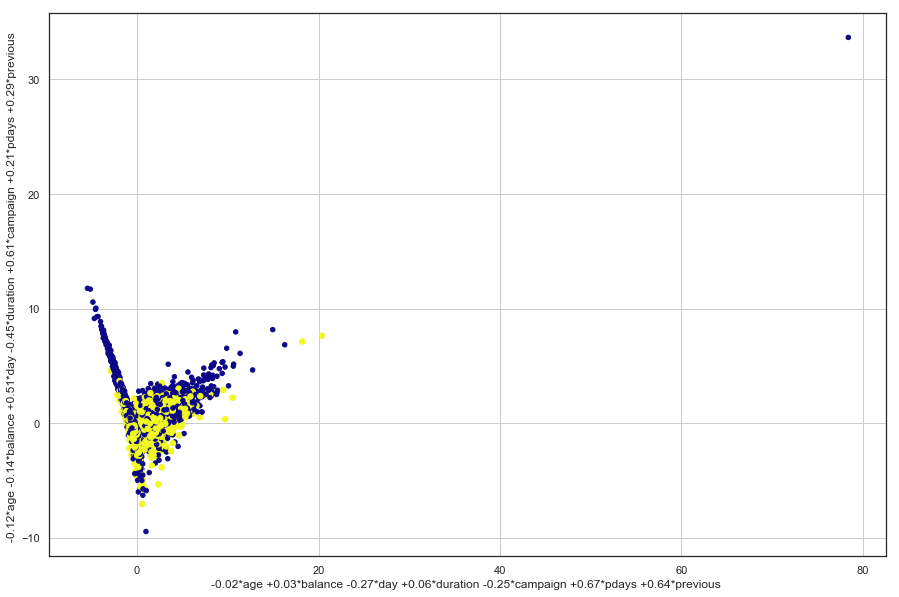

In [48]:
plt.figure(figsize=(15,10))
sns.set(style="white")
plt.scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["Target"], cmap ="plasma", s = (df_pca["Target"] + 2)*10)
plt.xlabel(pca_weight_strings[0])
plt.ylabel(pca_weight_strings[1])
plt.grid()

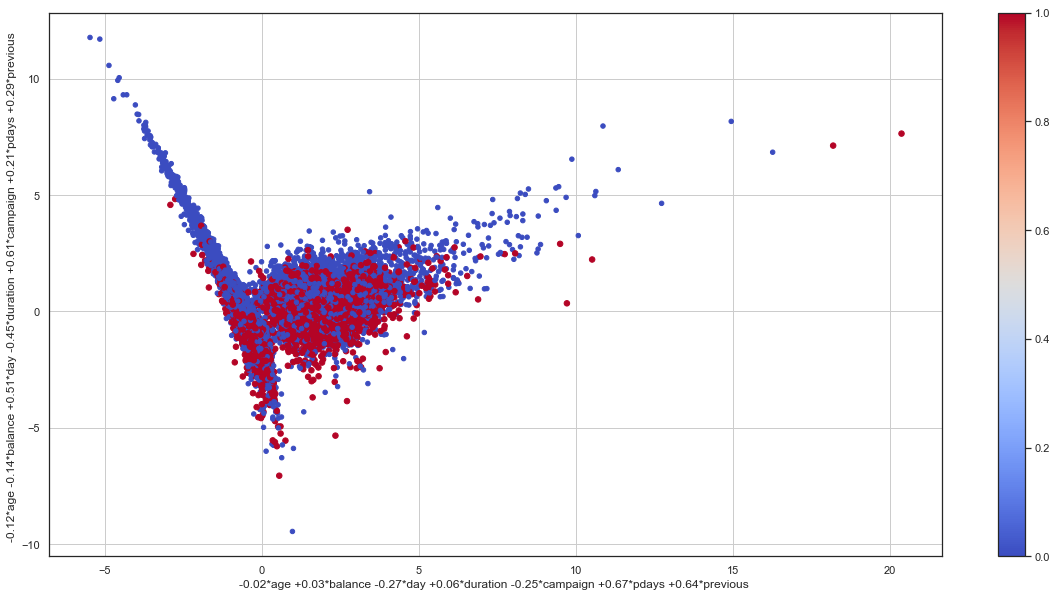

In [49]:
# Determine the index of outlier observation and temporary remove that obervation to visualize the 
# data seperation, if any, better
tmpDf = pd.DataFrame()
tmpDf = df_pca.drop(index = df_pca[df_pca[pca_weight_strings[0]] > 50].dropna(how = "all", axis = 0).index[0], \
                    axis = 0)
# Plot again
plt.figure(figsize=(20,10))
plt.scatter(x = tmpDf[pca_weight_strings[0]], y = tmpDf[pca_weight_strings[1]] , \
            c = tmpDf["Target"], cmap ="coolwarm", s = (tmpDf["Target"] + 2)*10)
plt.xlabel(pca_weight_strings[0])
plt.ylabel(pca_weight_strings[1])
plt.grid()
plt.colorbar()

After performing the PCA, there is a lone data point in the upper right.  This data point represents the client that is denoted as having participated in 275 marketing campaigns.  With the average of previous campaigns being 21 with the min and max of the remainder of the clients being 0 to 58, we have decided to remove that data point identifying it as a possible incorrect data entry.

In [50]:
# Perform The LDA
lda = LDA(n_components=1)
X_lda = lda.fit(X = bankPromoPCA_Df.drop("Target", axis =1), \
                y = bankPromoPCA_Df["Target"]).transform(bankPromoPCA_Df.drop("Target", axis =1))
lda_weight_strings = get_feature_names_from_weights(lda.scalings_.T, numericalVars)
df_lda = pd.DataFrame(X_lda,columns=[lda_weight_strings])
df_lda["Target"] = bankPromoPCA_Df["Target"]

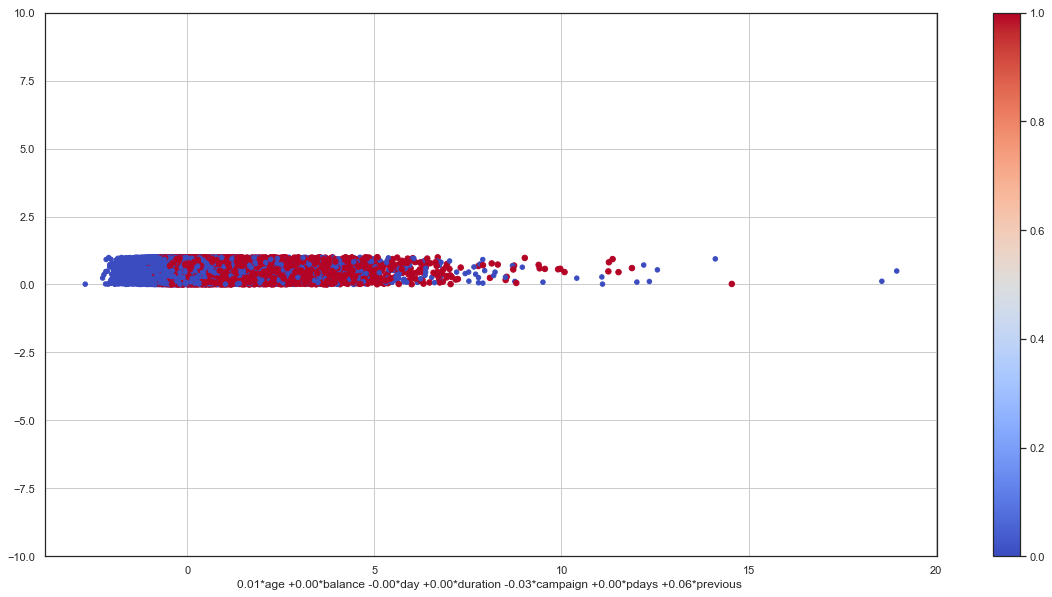

In [51]:
plt.figure(figsize=(20,10))
plt.scatter(x = df_lda[lda_weight_strings[0]] , y = np.zeros(df_lda[lda_weight_strings[0]].shape[0]) + \
            np.random.rand(df_lda[lda_weight_strings[0]].shape[0]), \
            c = df_lda["Target"], cmap ="coolwarm", s = (df_lda["Target"] + 2)*10)
plt.xlabel(lda_weight_strings[0])
plt.ylim(-10,10)
plt.colorbar()
plt.grid()

Now with the data point removed, the PCA appears to show exactly the same result.  Despite the data point being far away from the mean, there are too many data points in the data set that it caused the outlier to be insignificant